<a href="https://colab.research.google.com/github/macruga/predictive-analytics/blob/main/Iris_Classification_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Classification

In this example, we will develop a couple of machine learning models to classify different species of Iris, specifically iris Setosa, Versicolor, Virginica. We will solve the problem one step at a time to understand the process of machine learning and the some of the math behind it. Don't worry if you are not great at math, it's not as complicated as you might think.

The [iris data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) is available as part of [Sci-kit learn](https://scikit-learn.org/stable/), so it's a nice place to start and demonstrates the basic idea.

![picture](https://drive.google.com/uc?id=12MNJh5Xv1jERx5vxhJ6v8-cIq5d8SM-Q)


The data set contains 50 samples from each of three species of Iris. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. These four features can be used to train a machine learning model to classify or predict the species of a particular Iris.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import math
#sns.set('whitegrid')

In [ ]:
iris = datasets.load_iris()

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
len(iris.data)

150

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Text(0.5, 1.0, 'Sepal size distribution')

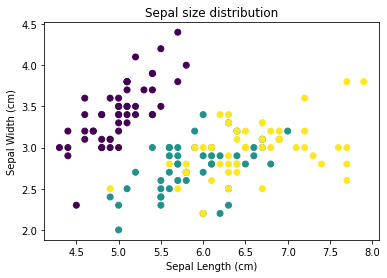

In [ ]:
# Select all rows and only first two columns (sepal length/width)
X = iris.data[:, :2]

# Target will be used to plot samples in different colors for different species
Y = iris.target

plt.scatter(X[:,0], X[:,1], c=Y)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal size distribution')

Text(0.5, 1.0, 'Petal size distribution (cm)')

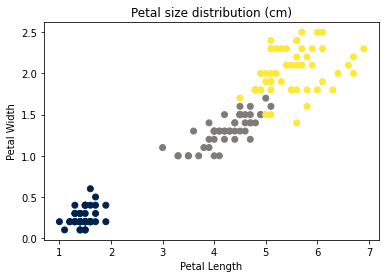

In [ ]:
# Select all rows and only last two columns (sepal length/width)
X = iris.data[:, 2:]

# Target will be used to plot samples in different colors for different species
Y = iris.target

plt.scatter(X[:,0], X[:,1], c=Y, cmap='cividis')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal size distribution (cm)')

## Logistic Regression Model

We will create a basic model that predicts if a sample is one of the three species or not.

The structure of the model appears below:


![picture](https://drive.google.com/uc?id=17-VS7Iv-cC9IoeT2FcpXMeKUZy_do-lm)


In 1958, an image recognition machine was developed with 400 [perceptrons](https://en.wikipedia.org/wiki/Perceptron) at the Cornell Aeronautical Lab. It showed some inital promise, but turned out to have limited capability. It paved the way for more sophisticated [multi-layer perceptrons](https://en.wikipedia.org/wiki/Multilayer_perceptron) which are more powerful and widely used in deep learning models today. 

## Sigmoid Function

The [Sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) is commonly used in logistic regression and artificial neurons. It's one way to convert continous values into more of a binary value. This also called an activation function in neural networks. There are many other types of activation functions in use today.

Text(0.5, 1.0, 'Logistic Sigmoid')

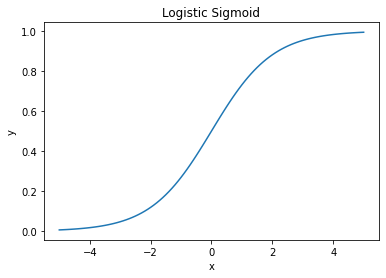

In [ ]:
def sigmoid(z):
  return 1.0/(1 + math.e ** (-z))

x = [i * 0.1 for i in range(-50, 51)]
y = [sigmoid(z) for z in x]
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Logistic Sigmoid')

## Prediction Function

This function takes one sample, multiplies by the weights, adds a bias, and passes the sum through a Sigmoid function. This function will be used to determine weights and biases during training as well as make predictions after training is complete.

In [ ]:
def predict(sample):
  result  = 0.0
  for i in range(len(sample)):
    result = result + weights[i] * sample[i]
    
  result = result + bias
  return sigmoid(result)

## Loss and Cost Functions

The loss function compares the predicted output with the expected output for a single training sample. If the absolute difference between the predicted and expected output is high, the loss should be high. The loss function here is a bit more complicated than a simple difference between predicted output and expected output, because it is known to make training easier.

$$\mathcal L(y, \hat y) = -(y \log \hat y + (1-y) \log (1 - \hat y))$$

Where $\mathcal L$ is the loss, $y$ is the training sample or ground truth, and $\hat y$ is the predicted value from the model.

In [ ]:
def loss(y_train, y_predicted):
  return -(y_train * math.log(y_predicted) + (1.0 - y_train) * math.log(1 - y_predicted))

We can see how this function behaves for a fixed training value and a range of predicted values.

Text(0.5, 1.0, 'Loss near 0.90')

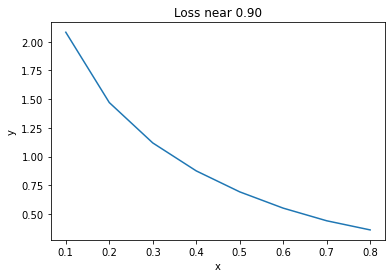

In [ ]:
y_train = 0.9
x = [i * 0.1 for i in range(1, 9)]
y = [loss(y_train, yp) for yp in x]
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Loss near %0.2f' % y_train)

The cost function is the average of the loss over all training samples:

$$\mathcal J = \frac{1}{m} \sum_{i=0}^{m} \mathcal L(y, \hat y)$$

Backpropagation Algorithm

[Backpropagation](https://en.wikipedia.org/wiki/Backpropagation) is a widely used algorithm for training machine learning models. It attempts to learn weights and biases by iteratively adjusting these values in order to minimize the loss between predicted and expected output.

In [ ]:
num_features = iris.data.shape[1]

def train_one_epoch(x_train_samples, y_train_samples):
  cost = 0.0
  dw = [0.0] * num_features
  db = 0.0

  global bias, weights

  m = len(x_train_samples)
  for i in range(m):
    x_sample = x_train_samples[i]
    y_sample = y_train_samples[i]
    predicted = predict(x_sample)
    cost = cost + loss(y_sample, predicted)
    
    # dz is the derivative of the loss function
    dz = predicted - y_sample
    
    for j in range(len(weights)):
      dw[j] = dw[j] + x_sample[j] * dz
    db = db + dz
  
  cost = cost / m
  db = db / m
  bias = bias - learning_rate*db
  for j in range(len(weights)):
    dw[j] = dw[j] / m
    weights[j] = weights[j] - learning_rate*dw[j]
  
  return cost

## Training Algorithm


This algorithm with iterate through the training data many times and call the backpropagation function.

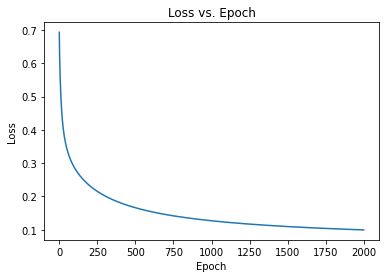

In [ ]:
# Model will "learn" values for the weights and biases

weights = [0.0] * num_features
bias = 0.0

learning_rate = 0.1

epochs = 2000

x_train_samples = iris.data
y_train_samples = [1 if y == 2 else 0 for y in iris.target]

loss_array = []
for epoch in range(epochs):
  loss_value = train_one_epoch(x_train_samples, y_train_samples)
  loss_array.append(loss_value)

plt.plot(range(epochs), loss_array)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss vs. Epoch')
plt.show()

## Make Predictions

Once the model is trained, it can be used to make predictions.

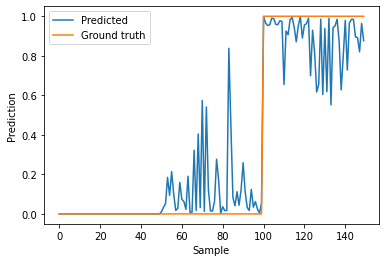

Accuracy: 98.00 %


In [ ]:
predictions = []

m = len(x_train_samples)
correct = 0
for i in range(m):
  sample = x_train_samples[i]
  value = predict(sample)
  predictions.append(value)
  if value >= 0.5:
    value = 1
  else:
    value = 0
  if value == y_train_samples[i]:
    correct = correct + 1.0

plt.plot(range(m), predictions, label='Predicted')
plt.plot(range(m), y_train_samples, label='Ground truth')
plt.ylabel('Prediction')
plt.xlabel('Sample')
plt.legend(loc='best')
plt.show()

print('Accuracy: %.2f %%' % (100 * correct/m))

# KNN Part...

In [ ]:

import scipy as sp
from pandas.plotting import andrews_curves
from pandas.plotting import parallel_coordinates

from sklearn.preprocessing import LabelEncoder

# Fitting clasifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# 3D Visualization
from mpl_toolkits.mplot3d import Axes3D